# **Step 1 : Download the dataset and Importing Libraries**

In [1]:
#install kaggle
!pip install kaggle

In [2]:
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.8 MB/s eta 0:00:00


In [3]:
#create a kaggle folder
! mkdir ~/.kaggle/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 424M/428M [00:04<00:00, 68.7MB/s]
100% 428M/428M [00:04<00:00, 109MB/s] 


In [4]:
!unzip  toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, f1_score
import pickle
import seaborn as sn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
import keras
from keras import layers, Sequential
from keras.layers import Conv1D, Activation, Dropout, Dense, Flatten, MaxPooling1D
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras import utils, layers, Sequential
from tensorflow.keras import regularizers
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras

In [6]:
paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print('Dataset is loaded')

Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_third_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dodge_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hash_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rain_ps.wav']

In [9]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps


In [10]:
df['label'].value_counts()

,count
label,
ps,400
fear,400
happy,400
sad,400
disgust,400
neutral,400
angry,400


In [11]:
df['label_count']= df['label'].value_counts()
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps
...,...,...
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

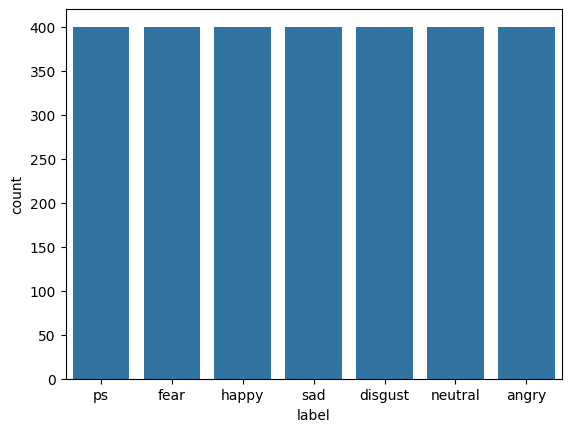

In [13]:
sn.countplot(data=df, x='label')

In [14]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,ps,NaN
1,/content/tess toronto emotional speech set dat...,ps,NaN
2,/content/tess toronto emotional speech set dat...,ps,NaN
3,/content/tess toronto emotional speech set dat...,ps,NaN
4,/content/tess toronto emotional speech set dat...,ps,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,angry,NaN
2796,/content/tess toronto emotional speech set dat...,angry,NaN
2797,/content/tess toronto emotional speech set dat...,angry,NaN
2798,/content/tess toronto emotional speech set dat...,angry,NaN


# **Step 2: Functions**

In [15]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [17]:
df.drop('label_count', axis=1, inplace = True)

In [18]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...    ps
1  /content/tess toronto emotional speech set dat...    ps
2  /content/tess toronto emotional speech set dat...    ps
3  /content/tess toronto emotional speech set dat...    ps
4  /content/tess toronto emotional speech set dat...    ps
['ps' 'fear' 'happy' 'sad' 'disgust' 'neutral' 'angry']


In [19]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_third_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dodge_ps.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_late_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_sub_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_boat_angry.wav'],
      dtype=object)

# **Step 3 : Data processing**

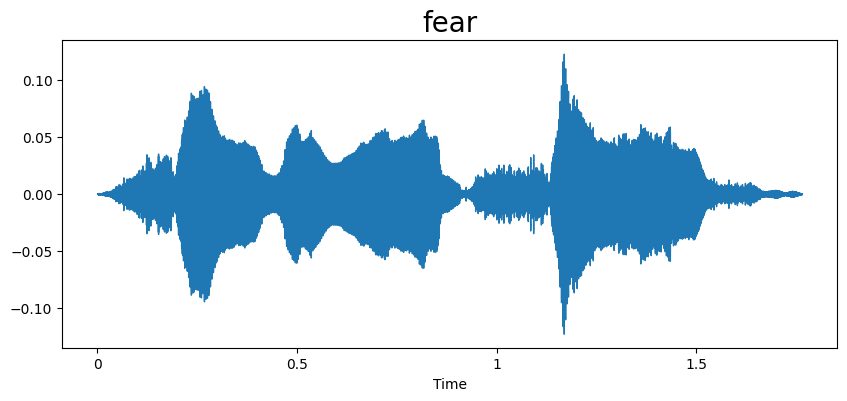

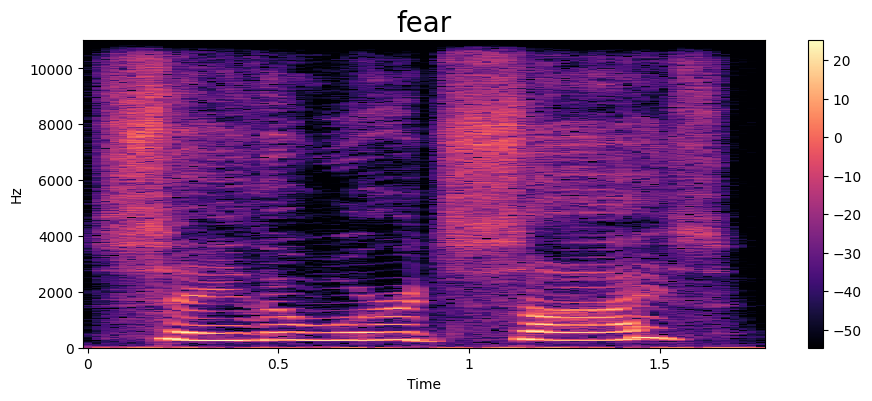

In [20]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

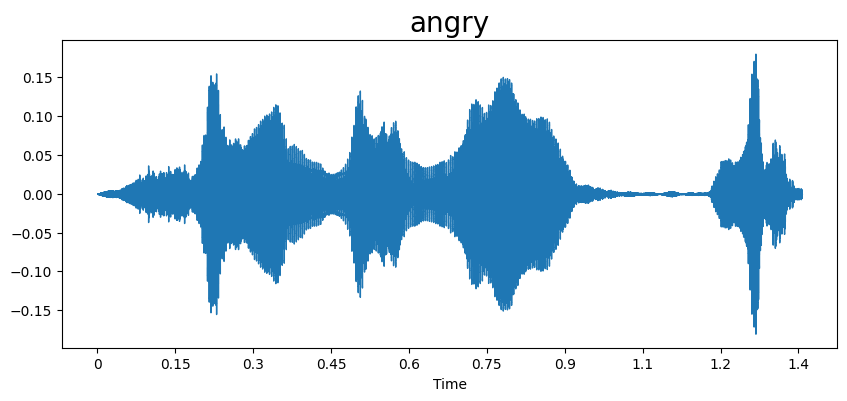

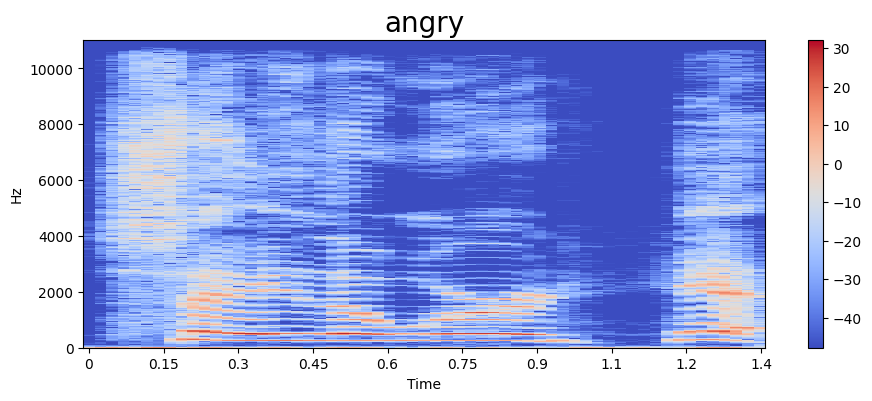

In [21]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

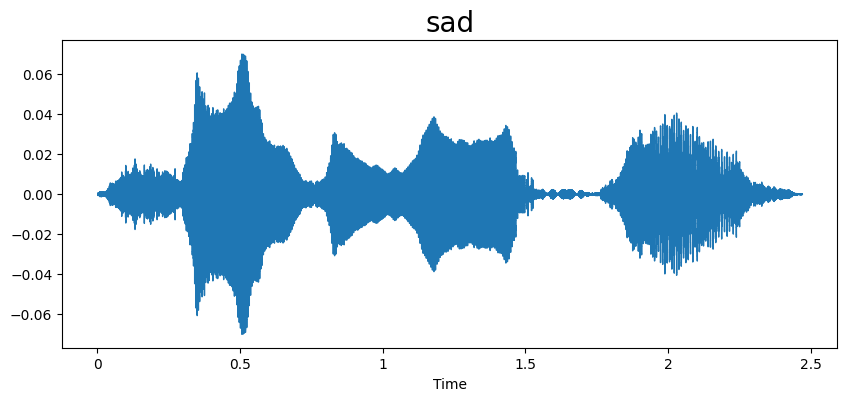

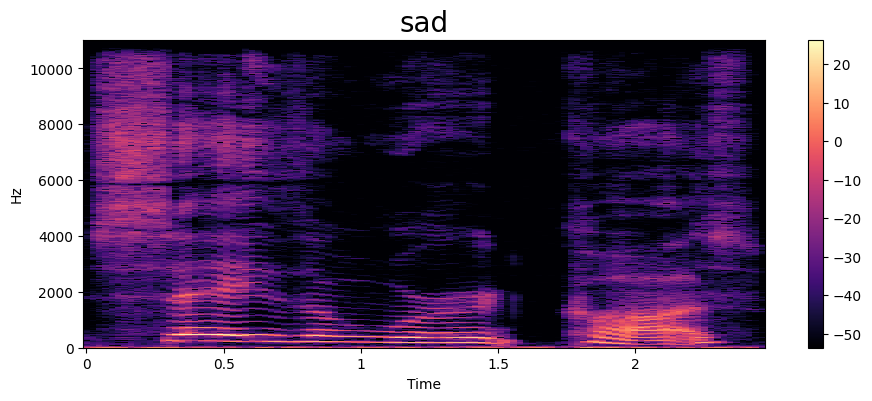

In [22]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

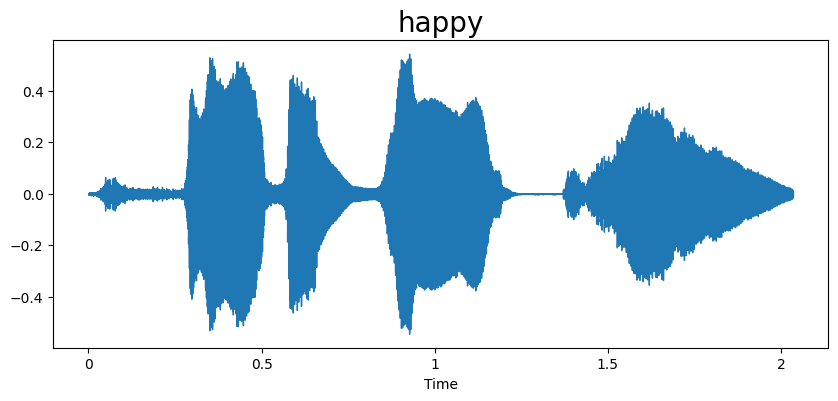

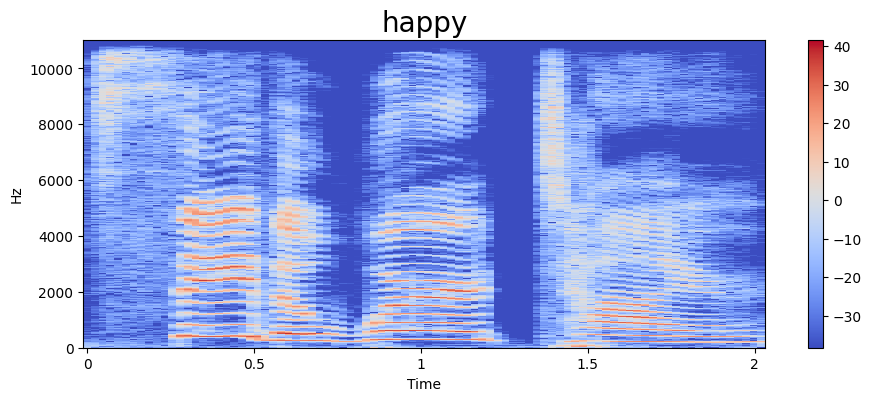

In [23]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

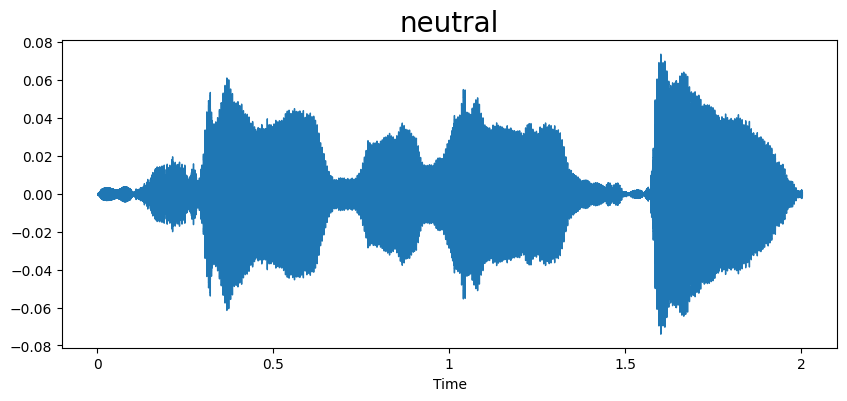

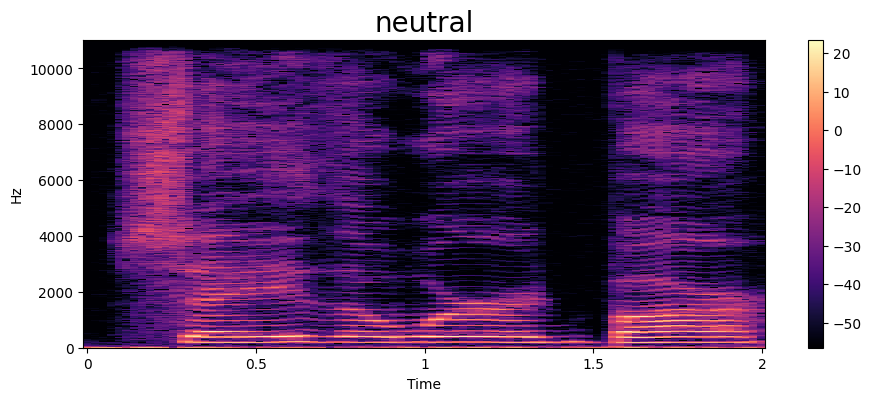

In [24]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

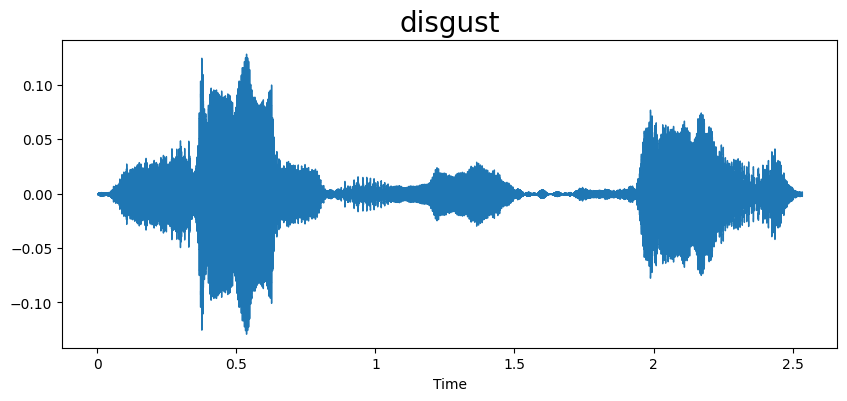

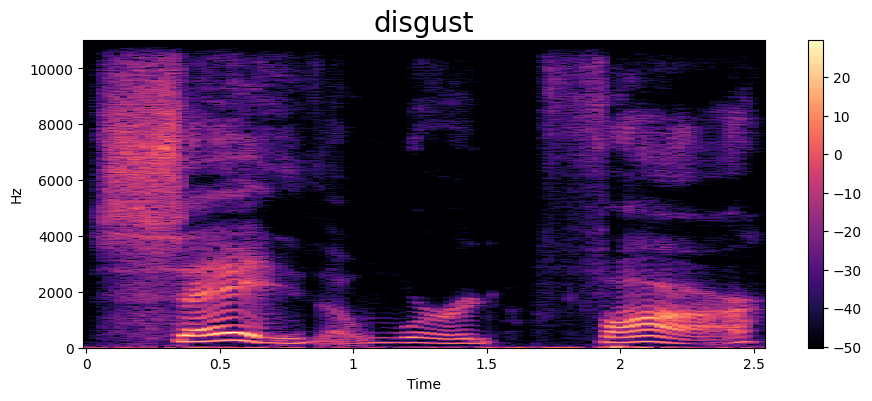

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **MCFF**


In [26]:
#feauture extraction

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [27]:
extract_mfcc(df['speech'][0])

array([-4.41835510e+02,  1.11251320e+02,  1.31647577e+01, -3.48225098e+01,
        1.04642429e+01,  7.65692902e+00, -1.69377613e+01, -1.45766106e+01,
       -1.81218052e+01, -1.06235170e+00, -2.26677742e+01, -6.78643084e+00,
       -4.51744080e+00, -5.34471941e+00, -3.76795501e-01,  8.94247651e-01,
        9.79347825e-01,  1.18102989e+01,  2.64161158e+00, -5.95613480e-01,
        5.00193715e-01,  3.63190389e+00, -4.66626453e+00,  5.90995598e+00,
       -6.33682823e+00,  5.84294224e+00, -6.05019140e+00,  7.25089645e+00,
       -5.04784775e+00,  6.47311020e+00,  4.27318990e-01,  1.06886683e+01,
        1.22499161e+01,  8.55145073e+00,  1.24270267e+01,  1.21654406e+01,
        1.32146015e+01,  1.46062775e+01,  1.03210115e+01,  1.08426104e+01],
      dtype=float32)

In [28]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

,speech
0,"[-441.8355, 111.25132, 13.164758, -34.82251, 1..."
1,"[-496.56116, 117.238655, 21.471125, 1.8774668,..."
2,"[-429.57617, 96.84065, 10.537672, -11.502708, ..."
3,"[-476.07047, 120.36238, -23.18892, -4.1534038,..."
4,"[-417.7034, 110.75616, 2.8642013, -18.923342, ..."
...,...
2795,"[-335.12985, 30.14752, 0.06873559, 13.134081, ..."
2796,"[-389.04993, 90.45158, 5.151683, 44.672207, 0...."
2797,"[-322.15805, 43.490833, -5.3218946, 9.012743, ..."
2798,"[-324.36246, 55.675537, -4.9687376, 1.275695, ..."


In [29]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [30]:
# input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [31]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [32]:
y = y.toarray()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 4 : Model training**
# **Create the LSTM Model**

In [34]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - accuracy: 0.2318 - loss: 1.8647 - val_accuracy: 0.5643 - val_loss: 1.0658
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.5157 - loss: 1.1860 - val_accuracy: 0.7661 - val_loss: 0.6504
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.6890 - loss: 0.7747 - val_accuracy: 0.8732 - val_loss: 0.4449
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - accuracy: 0.7697 - loss: 0.6744 - val_accuracy: 0.9143 - val_loss: 0.2419
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.8656 - loss: 0.4669 - val_accuracy: 0.9500 - val_loss: 0.1405
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.9165 - loss: 0.2688 - val_accuracy: 0.9714 - val_loss: 0.0926
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9283 - loss: 0.2517 - val_accuracy: 0.9625 - val_loss: 0.1181
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.9131 - loss: 0.3010 - val_accuracy: 0

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

In [ ]:
rmse_lstm = f1_score(y_val_classes, y_pred_classes, average='weighted') # Remove the second np.argmax as y_pred_classes is already in the correct format
print(rmse_lstm)

In [ ]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Create SVM Model**

In [ ]:
# Assuming df is your DataFrame with 'speech' and 'label' columns
# Encode the labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [ ]:
# Feature extraction function (you'll need to replace this with your actual feature extraction logic)
def extract_features(file_name):
    # Simulating feature extraction
    return np.random.rand(40)  # Replace with actual feature extraction

In [ ]:
# Apply feature extraction to the dataset
df['features'] = df['speech'].apply(lambda x: extract_features(x))
X = np.array(df['features'].tolist())
y = np.array(df['label'].tolist())

In [ ]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

In [ ]:
# Predict and evaluate
y_pred_probe = svm_model.predict(X_val)
svm_conf_matrix = confusion_matrix(y_val, y_pred_probe)
svm_classification_report = classification_report(y_val, y_pred_probe)

In [ ]:
print("Confusion Matrix:\n", svm_conf_matrix)

In [ ]:
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print(classification_report(y_val, y_pred_probe, target_names=target_names))

In [ ]:
rmse_svm = f1_score(y_val, y_pred_probe, average='weighted')
print(rmse_svm)

# **Create CNN Model**

In [ ]:
data_directory = "/content/TESS Toronto emotional speech set data"

In [ ]:
def load_data(data_directory, save=False):
    # Load your data here
    # ...

    print(f"Data loaded from {data_directory}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")

    if save:
        np.save("X.npy", X)
        np.save("y.npy", y)

    return X, y

In [ ]:
def extract_feature(data, sr, mfcc, chroma, mel):

    """
    extract features from audio files into numpy array

    Parameters
    ----------
    data : np.ndarray, audio time series
    sr : number > 0, sampling rate
    mfcc : boolean, Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
    chroma : boolean, pertains to the 12 different pitch classes
    mel : boolean, Mel Spectrogram Frequency

    """

    if chroma:
        stft = np.abs(librosa.stft(data))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(data, sr=sr).T,axis=0)
        result = np.hstack((result, mel)) # Dedent this line to align with the 'if mel' block

    return result

In [ ]:
def noise(data, noise_factor):

    """
    add random white noises to the audio

    Parameters
    ----------
    data : np.ndarray, audio time series
    noise_factor : float, the measure of noise to be added

    """
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise

    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [ ]:
def shift(data, sampling_rate, shift_max, shift_direction):

    """
    shift the spectogram in a direction

    Parameters
    ----------
    data : np.ndarray, audio time series
    sampling_rate : number > 0, sampling rate
    shift_max : float, maximum shift rate
    shift_direction : string, right/both

    """
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    if shift > 0:
        augmented_data[:shift] = 0
    else:
        augmented_data[shift:] = 0

    return augmented_data

In [ ]:
def load_data(save=False):

    """
    loading dataset

    Parameters
    ----------
    save : boolean, save the data to disk as .npy

    """
    x, y = [], []
    for file in glob.glob(data_directory + "/Actor_*/*.wav"):
        # load an audio file as a floating point time series.
        data, sr = librosa.load(file)

        # extract features from audio files into numpy array
        feature = extract_feature(data, sr, mfcc=True, chroma=True, mel=True)
        x.append(feature)

        file_name = os.path.basename(file)

        # get emotion label from the file name
        emotion = emotions[file_name.split("-")[2]]
        y.append(emotion)

        # add noise to the data
        n_data = noise(data, 0.001)
        n_feature = extract_feature(n_data, sr, mfcc=True, chroma=True, mel=True)
        x.append(n_feature)
        y.append(emotion)
        # shift the data
        s_data = shift(data,sr,0.25,'right')
        s_feature = extract_feature(s_data, sr, mfcc=True, chroma=True, mel=True)
        x.append(s_feature)
        y.append(emotion)

    if save==True:
        np.save('X', np.array(x))
        np.save('y', y)

    return np.array(x), y

In [ ]:
data_directory = "/content/TESS Toronto emotional speech set data"
X, y = load_data(save=True)  # Save the data to disk

X = np.load("X.npy")
y = np.load("y.npy")

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

In [ ]:
# Feature extraction function (you'll need to replace this with your actual feature extraction logic)
def extract_features(file_name):
    # Simulating feature extraction
    return np.random.rand(40)  # Replace with actual feature extraction
# Apply feature extraction to the dataset
df['features'] = df['speech'].apply(lambda x: extract_features(x))
X = np.array(df['features'].tolist())
y = np.array(df['label'].tolist())

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {x_train.shape}, Test set: {x_test.shape}")

In [ ]:
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

y_train = labelencoder.transform(y_train)
y_test = labelencoder.transform(y_test)

In [ ]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

In [ ]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same', input_shape=(40,1))) # 1st layer
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))) # 2nd layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))) # 3rd layer
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4))) # 4th layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"


In [ ]:
# Calculate the expected input size for the dense layer
# Use model.summary() to get the actual output shape before the Flatten layer
model.summary()  # Check the output shape of the last Conv1D layer

# Assuming the output shape of the last Conv1D layer is (None, 22, 128)
model.add(Flatten())
model.add(Dense(units=8,
                # input_dim is automatically inferred after Flatten
                kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                bias_regularizer=regularizers.l2(1e-4),
                activity_regularizer=regularizers.l2(1e-5)
                )
) # 7th layer
model.add(Activation('softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(decay=1e-6)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [ ]:
XProccessed = np.expand_dims(x_train, axis=2)
XTestProcessed = np.expand_dims(x_test, axis=2)
history = model.fit(XProccessed, y_train, epochs=30, validation_data=(XTestProcessed, y_test), batch_size=64)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_pred_p = model.predict(XTestProcessed)

In [ ]:
y_pred = np.argmax(y_pred_p, axis=1)

In [ ]:
print(y_pred.shape)
print(y_test.shape)

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
y_test_converted = np.argmax(y_test, axis=-1)
cm=metrics.confusion_matrix(y_test,np.argmax(y_pred_p,axis=-1))

df_cm=pd.DataFrame(cm,index=[i for i in target_names],columns=[i for i in target_names])
plt.figure(figsize=(10,7))
sn.heatmap(df_cm,annot=True)

In [ ]:
rmse_cnn = f1_score(y_test,np.argmax(y_pred_p,axis=-1),average='weighted')
print(rmse_cnn)

# **Step 5 : Comapring Models According F1_Score**

In [ ]:
#Compare the results

data_model_1 = {"MODEL":pd.Series(["LSTM","SVM","CNN"]),"RMSE_Values":pd.Series([rmse_lstm,rmse_svm,rmse_cnn])}
table_rmse=pd.DataFrame(data_model_1)
table_rmse.sort_values(['RMSE_Values'])